In [461]:
import cv2
import helpers
import numpy as np

from matplotlib import pyplot as plt

In [462]:
image = cv2.imread(r'E:\YAVU\Test_data\Inputs\testing.jpg')
dimensions = helpers.FrameDimensions()
det = helpers.model_processor(padding=10)
det.detect_for_image(image)

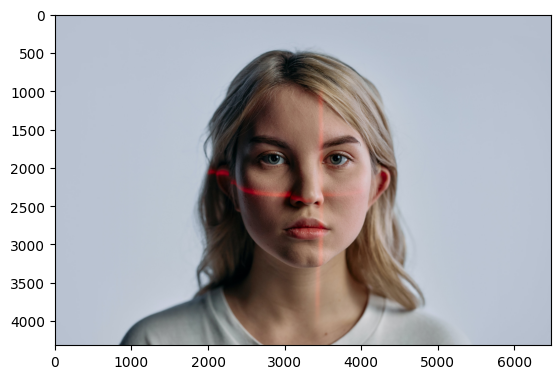

In [463]:
plt.imshow(image[:,:,::-1])

In [464]:
landmarks = np.load(r'E:\YAVU\temp\npy_files\image_landmarks.npy')

In [465]:
landmarks

array([[[0.50773919, 0.62322599],
        [0.5056147 , 0.56193453],
        [0.50630188, 0.58135772],
        [0.49475414, 0.50227481],
        [0.50527984, 0.5436877 ],
        [0.50499618, 0.51963717],
        [0.50500309, 0.46005511],
        [0.41841376, 0.44679618],
        [0.50430363, 0.41277814],
        [0.50408202, 0.38775942],
        [0.50226694, 0.28684822],
        [0.50802165, 0.63189274],
        [0.50840092, 0.64089179],
        [0.50836682, 0.64787734],
        [0.50853872, 0.64845234],
        [0.5086897 , 0.65870064],
        [0.50906503, 0.6712414 ],
        [0.50909406, 0.68368864],
        [0.5098173 , 0.70098567],
        [0.50585419, 0.57177353],
        [0.49553388, 0.57300162],
        [0.36907858, 0.36955184],
        [0.45192069, 0.46476927],
        [0.43953249, 0.46594515],
        [0.42739347, 0.46537179],
        [0.41247463, 0.45413056],
        [0.46242762, 0.46197379],
        [0.43070385, 0.40836754],
        [0.44640017, 0.41193527],
        [0.417

In [466]:
landmarks = landmarks*[image.shape[1], image.shape[0]]

In [467]:
landmarks = landmarks.reshape(486, 1, 2).astype(np.int32)

In [468]:
outline = cv2.convexHull(landmarks[:468], clockwise=True, returnPoints=True)

In [469]:
outline

array([[[2330, 1935]],

       [[2336, 2112]],

       [[2357, 2297]],

       [[2399, 2495]],

       [[2467, 2709]],

       [[2560, 2881]],

       [[2663, 3008]],

       [[2791, 3116]],

       [[2900, 3189]],

       [[3015, 3254]],

       [[3145, 3304]],

       [[3308, 3317]],

       [[3467, 3297]],

       [[3587, 3243]],

       [[3686, 3176]],

       [[3779, 3100]],

       [[3887, 2990]],

       [[3972, 2864]],

       [[4048, 2691]],

       [[4106, 2480]],

       [[4144, 2284]],

       [[4160, 2101]],

       [[4158, 1925]],

       [[4134, 1740]],

       [[4092, 1588]],

       [[4018, 1450]],

       [[3899, 1344]],

       [[3712, 1276]],

       [[3503, 1243]],

       [[3252, 1238]],

       [[2996, 1245]],

       [[2781, 1277]],

       [[2590, 1347]],

       [[2466, 1455]],

       [[2389, 1595]],

       [[2349, 1749]]], dtype=int32)

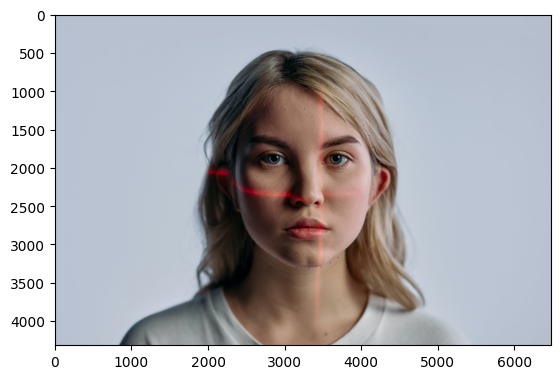

In [470]:
img_cpy = image.copy()
cv2.polylines(img_cpy, outline, True, (255, 0, 0), 10)
plt.imshow(img_cpy[:,:,::-1])

### OLD CROPPER

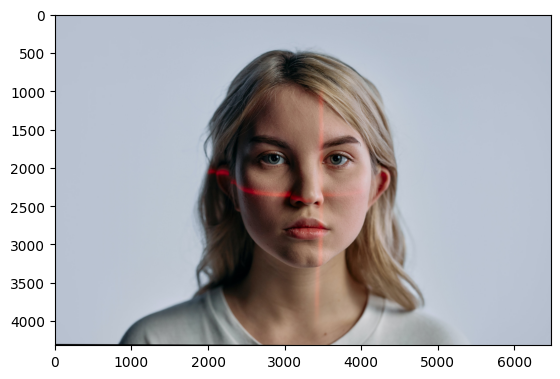

In [471]:
fhelpers = helpers.FaceHelpers(image_mode=True, dimensions=dimensions)
ali = image.copy()
ali_face, rotmax = fhelpers.alignment_procedure(ali)
plt.imshow(ali_face[:,:,::-1])

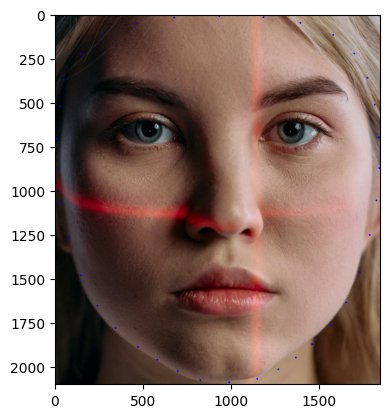

In [472]:
face, bbox = fhelpers.crop_extracted_face(img_cpy, rotmax)
plt.imshow(face[:,:,::-1])

### NEW CROPPER

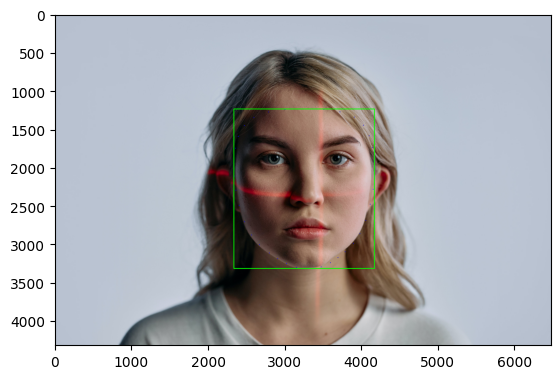

In [473]:
bbox = cv2.boundingRect(outline)
cv2.rectangle(img_cpy, (bbox[0], bbox[1]), (bbox[0]+bbox[2], bbox[1]+bbox[3]), (0, 255, 0), 10)
plt.imshow(img_cpy[:,:,::-1])

### MAKING AND SEGMENTATION

In [474]:
mask = np.zeros(image.shape[:2], dtype=np.uint8)
mask = cv2.fillConvexPoly(mask, outline, 255)

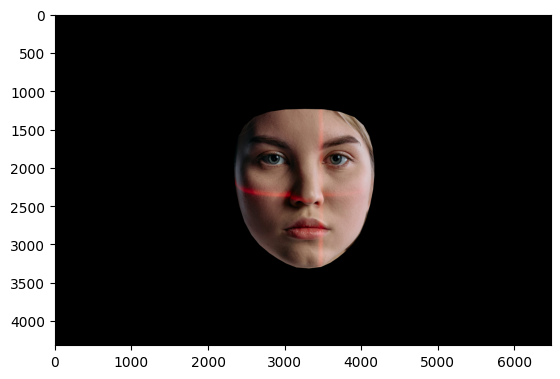

In [475]:
face = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(face[:,:,::-1])

In [476]:
landmarks.reshape(1, 486, 2)

array([[[3287, 2690],
        [3273, 2425],
        [3278, 2509],
        [3203, 2168],
        [3271, 2347],
        [3269, 2243],
        [3269, 1986],
        [2709, 1928],
        [3265, 1781],
        [3263, 1673],
        [3252, 1238],
        [3289, 2727],
        [3291, 2766],
        [3291, 2796],
        [3292, 2799],
        [3293, 2843],
        [3296, 2897],
        [3296, 2951],
        [3301, 3026],
        [3275, 2468],
        [3208, 2473],
        [2389, 1595],
        [2926, 2006],
        [2845, 2011],
        [2767, 2009],
        [2670, 1960],
        [2994, 1994],
        [2788, 1762],
        [2890, 1778],
        [2700, 1776],
        [2648, 1809],
        [2596, 2014],
        [3014, 3123],
        [2680, 1904],
        [2358, 1953],
        [2498, 1951],
        [2879, 2356],
        [3203, 2674],
        [3216, 2768],
        [3117, 2713],
        [3063, 2754],
        [3152, 2777],
        [3102, 2791],
        [2950, 2880],
        [3212, 2426],
        [3

# Delaunay triangulation

In [477]:
list1 = landmarks.reshape(-1, 2).tolist()
list1[:468]

tri_img = image.copy()

In [478]:
# Delaunay triangulation
rect = cv2.boundingRect(outline)
subdiv = cv2.Subdiv2D(rect)
subdiv.insert(list1[:468])
triangles = subdiv.getTriangleList()
tri_points = np.array(triangles, dtype=np.int32).reshape(-1, 3, 2)

# Draw lines for each triangle
cv2.polylines(tri_img, tri_points, isClosed=True, color=(0, 0, 255), thickness=1)


array([[[207, 192, 183],
        [207, 192, 183],
        [207, 192, 183],
        ...,
        [205, 190, 181],
        [205, 190, 181],
        [205, 190, 181]],

       [[207, 192, 183],
        [207, 192, 183],
        [207, 192, 183],
        ...,
        [205, 190, 181],
        [205, 190, 181],
        [205, 190, 181]],

       [[207, 192, 183],
        [207, 192, 183],
        [207, 192, 183],
        ...,
        [205, 190, 181],
        [205, 190, 181],
        [205, 190, 181]],

       ...,

       [[207, 192, 183],
        [207, 192, 183],
        [207, 192, 183],
        ...,
        [205, 190, 181],
        [205, 190, 181],
        [205, 190, 181]],

       [[207, 192, 183],
        [207, 192, 183],
        [207, 192, 183],
        ...,
        [205, 190, 181],
        [205, 190, 181],
        [205, 190, 181]],

       [[207, 192, 183],
        [207, 192, 183],
        [207, 192, 183],
        ...,
        [205, 190, 181],
        [205, 190, 181],
        [205, 190, 181]]

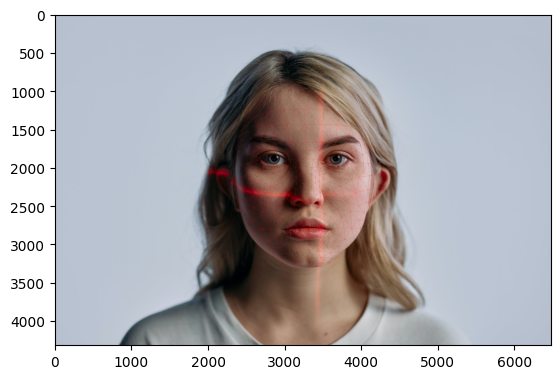

In [479]:
plt.imshow(tri_img[:,:,::-1])

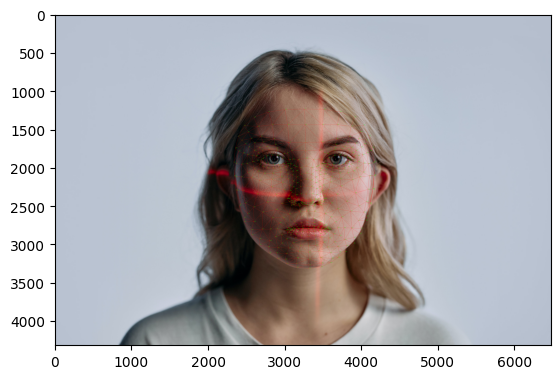

In [480]:
# Draw points
face_ref = image.copy()
for idx, point in enumerate(list1[:468]):
    cv2.putText(tri_img, str(idx), tuple(point), fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, fontScale=0.4, color=(0, 255, 0), thickness=1)

plt.imshow(tri_img[:,:,::-1])

In [481]:
cv2.imwrite(r'E:\YAVU\temp\face_ref.jpg', tri_img)

True